<a href="https://colab.research.google.com/github/RonakMehta21/Machine-Learning/blob/master/Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Clustering K-Means

## Machine Learning Life-cycle

> 1. Business Objective: Predicting Wildfire Damage Area
2. Dataset: [1.88 Million US Wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires/version/1#FPA_FOD_20170508.sqlite)
3. Data Wrangling, Exploratory Data Analysis, Preparation and Insights is shown below.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/open?id=1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ApRYxyMqnFKH8XW1GbQ-KZNJdbdeEdV9


In [0]:
#Import the necessary libraries
#Note: Please make sure to change the runtime type to TPU
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Fire.csv')

In [5]:
df = pd.read_csv('Fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Unprocessed dataset
df 

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,NaN,ODESSA 2,NaN,NaN,NaN,NaN,NaN,2015,2457291.5,269,1726.0,13.0,Missing/Undefined,2457291.5,269.0,1843.0,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457300.5,278,126.0,9.0,Miscellaneous,NaN,NaN,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457144.5,122,2052.0,13.0,Missing/Undefined,NaN,NaN,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457309.5,287,2309.0,13.0,Missing/Undefined,NaN,NaN,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


## Data Preparation

The features that would help provide hypothesis are:
``` python
FIRE_YEAR, STAT_CAUSE_DESCR, LATITUDE, LONGITUDE, STATE, DISCOVERY_DATE, FIRE_SIZE, SOURCE_REPORTING_UNIT, FIRE_SIZE_CLASS
```

In [7]:
#Selecting features that would help provide hypothesis
df_fire = df[['FIRE_YEAR','STAT_CAUSE_DESCR','LATITUDE','LONGITUDE','STATE','DISCOVERY_DATE','FIRE_SIZE','SOURCE_REPORTING_UNIT','FIRE_SIZE_CLASS']]
print(df_fire.head())

   FIRE_YEAR STAT_CAUSE_DESCR  ...  SOURCE_REPORTING_UNIT  FIRE_SIZE_CLASS
0       2005    Miscellaneous  ...                    511                A
1       2004        Lightning  ...                    503                A
2       2004   Debris Burning  ...                    503                A
3       2004        Lightning  ...                    503                A
4       2004        Lightning  ...                    503                A

[5 rows x 9 columns]


In [8]:
df_fire.isnull().sum() #To check any missing values

FIRE_YEAR                0
STAT_CAUSE_DESCR         0
LATITUDE                 0
LONGITUDE                0
STATE                    0
DISCOVERY_DATE           0
FIRE_SIZE                0
SOURCE_REPORTING_UNIT    0
FIRE_SIZE_CLASS          0
dtype: int64

It can be seen that the `DISCOVERY_DATE` is in Julian Format. It can be converted into Gregorian format.



In [9]:
df_fire['DATE'] = pd.to_datetime(df_fire['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df_fire.head()) #check the data

   FIRE_YEAR STAT_CAUSE_DESCR  ...  FIRE_SIZE_CLASS       DATE
0       2005    Miscellaneous  ...                A 2005-02-02
1       2004        Lightning  ...                A 2004-05-12
2       2004   Debris Burning  ...                A 2004-05-31
3       2004        Lightning  ...                A 2004-06-28
4       2004        Lightning  ...                A 2004-06-28

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_fire

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,SOURCE_REPORTING_UNIT,FIRE_SIZE_CLASS,DATE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,511,A,2005-02-02
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,503,A,2004-05-12
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,503,A,2004-05-31
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,503,A,2004-06-28
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,503,A,2004-06-28
...,...,...,...,...,...,...,...,...,...,...
1880460,2015,Missing/Undefined,40.481637,-122.389375,CA,2457291.5,0.01,CASHU,A,2015-09-26
1880461,2015,Miscellaneous,37.617619,-120.938570,CA,2457300.5,0.20,CATCU,A,2015-10-05
1880462,2015,Missing/Undefined,37.617619,-120.938570,CA,2457144.5,0.10,CATCU,A,2015-05-02
1880463,2015,Missing/Undefined,37.672235,-120.898356,CA,2457309.5,2.00,CATCU,B,2015-10-14


We can extract additional fields from `DATE`

In [11]:
df_fire['MONTH'] = pd.DatetimeIndex(df_fire['DATE']).month
df_fire['DAY_OF_WEEK'] = df_fire['DATE'].dt.weekday_name
df_orig = df_fire.copy() #I will use this copy later
print(df_fire.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE  ...       DATE MONTH  DAY_OF_WEEK
0       2005    Miscellaneous  40.036944  ... 2005-02-02     2    Wednesday
1       2004        Lightning  38.933056  ... 2004-05-12     5    Wednesday
2       2004   Debris Burning  38.984167  ... 2004-05-31     5       Monday
3       2004        Lightning  38.559167  ... 2004-06-28     6       Monday
4       2004        Lightning  38.559167  ... 2004-06-28     6       Monday

[5 rows x 12 columns]


### Exploratory Data Analysis

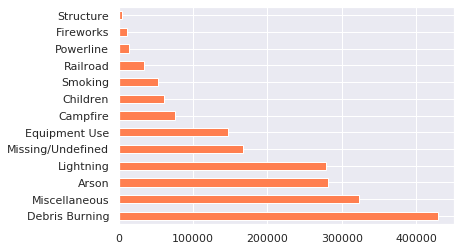

In [12]:
df_fire['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

There are 13 causes listed in the dataset.

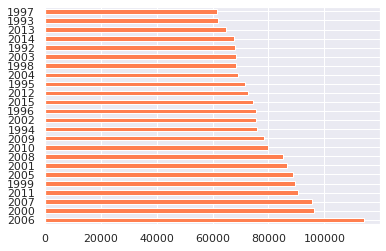

In [15]:
df_fire['FIRE_YEAR'].value_counts().plot(kind='barh',color='coral')
plt.show()

The number of fires reported are increasing from 1997 to 2006. The damage would increase in the next following years.

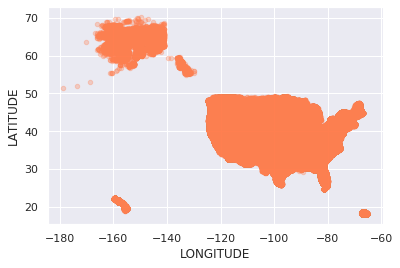

In [16]:
df_fire.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='coral',alpha=0.3)
plt.show()

`Longitude` and `Latitude` features can be beneficial for clustering.

In [17]:
df_fire['SOURCE_REPORTING_UNIT'].dtype

dtype('O')

## Training and Running the Model

To get a better idea of correlation between features we can plot a correlation matrix, first I will convert all features to numeric values, this is necessary for the machine learning stage

In [0]:
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [19]:
df_fire.dtypes

FIRE_YEAR                         int64
STAT_CAUSE_DESCR                  int64
LATITUDE                        float64
LONGITUDE                       float64
STATE                             int64
DISCOVERY_DATE                  float64
FIRE_SIZE                       float64
SOURCE_REPORTING_UNIT            object
FIRE_SIZE_CLASS                   int64
DATE                     datetime64[ns]
MONTH                             int64
DAY_OF_WEEK                       int64
dtype: object

In [14]:
le = preprocessing.LabelEncoder()
df_fire['STAT_CAUSE_DESCR'] = le.fit_transform(df_fire['STAT_CAUSE_DESCR'])
df_fire['STATE'] = le.fit_transform(df_fire['STATE'])
df_fire['DAY_OF_WEEK'] = le.fit_transform(df_fire['DAY_OF_WEEK'])
df_fire['FIRE_SIZE_CLASS'] = le.fit_transform(df_fire['FIRE_SIZE_CLASS'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



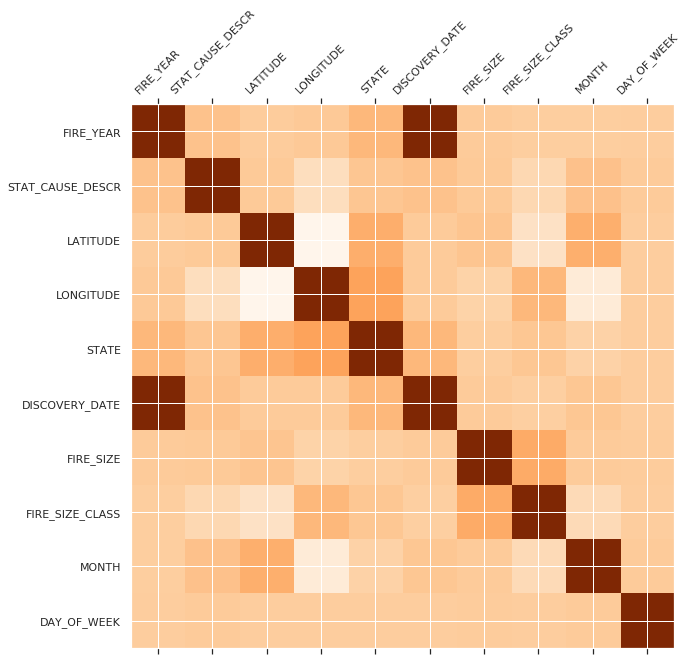

In [15]:
def plot_corr(df_fire,size=10):
    corr = df_fire.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df_fire)

In [0]:
from sklearn.cluster import KMeans
X=df_fire[['FIRE_SIZE','LONGITUDE','LATITUDE']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_means = kmeans.predict(X)

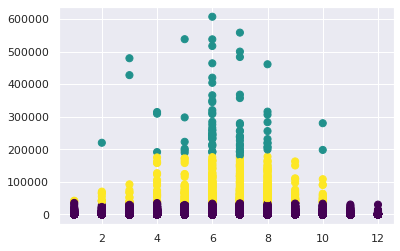

In [28]:
plt.scatter(df_fire['MONTH'],df_fire['FIRE_SIZE'], c=y_means, s=50, cmap='viridis')

In [0]:
from sklearn.cluster import KMeans
X=df_fire[['FIRE_SIZE','STATE']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_means = kmeans.predict(X)

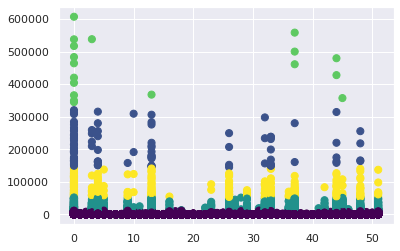

In [48]:
plt.scatter(df_fire['STATE'],df_fire['FIRE_SIZE'], c=y_means, s=50, cmap='viridis')

In [0]:
X2=df_fire[['FIRE_SIZE','STAT_CAUSE_DESCR']]
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(X2)
y_means2 = kmeans2.predict(X2)

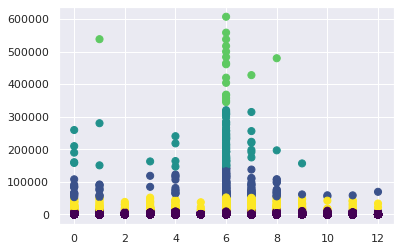

In [50]:
plt.scatter(df_fire['STAT_CAUSE_DESCR'],df_fire['FIRE_SIZE'], c=y_means2, s=50, cmap='viridis')

In [0]:
X3=df_fire[['LATITUDE','LONGITUDE']]
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(X3)
y_means3 = kmeans3.predict(X3)

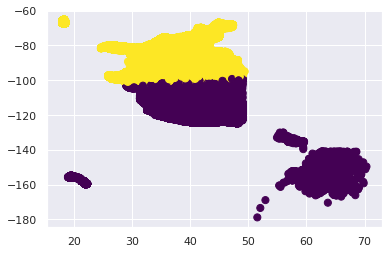

In [68]:
plt.scatter(df_fire['LATITUDE'],df_fire['LONGITUDE'], c=y_means3, s=50, cmap='viridis')

In [0]:
X4=df_fire[['FIRE_SIZE_CLASS','FIRE_SIZE']]
kmeans4 = KMeans(n_clusters=2)
kmeans4.fit(X4)
y_means4 = kmeans4.predict(X4)

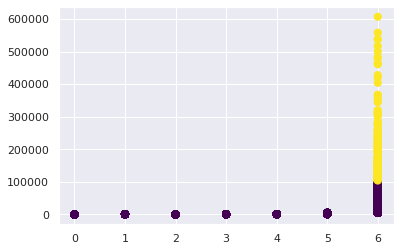

In [85]:
plt.scatter(df_fire['FIRE_SIZE_CLASS'],df_fire['FIRE_SIZE'], c=y_means4, s=50, cmap='viridis')

In [0]:
X5=df_fire[['FIRE_SIZE_CLASS','STATE']]
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X5)
y_means5 = kmeans5.predict(X5)

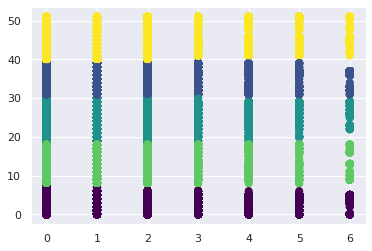

In [87]:
plt.scatter(df_fire['FIRE_SIZE_CLASS'],df_fire['STATE'], c=y_means5, s=50, cmap='viridis')

## Running K-Means with TensorFlow

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
X = df_fire[['MONTH','FIRE_SIZE']]

In [94]:
def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(X, dtype=tf.float32), num_epochs=1)

num_clusters = 5
kmeans = tf.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print ('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print ('score:', kmeans.score(input_fn))
print ('cluster centers:', cluster_centers)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwga540v7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa821100278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Vari

In [97]:
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(X):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print ('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwga540v7/model.ckpt-19
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
point: MONTH is in cluster 3 centered at [5.98058   1.6039715]
point: FIRE_SIZE is in cluster 3 centered at [5.98058   1.6039715]


In [0]:
from sklearn.cluster import DBSCAN
X = df_fire[['MONTH','FIRE_SIZE']][:10000]
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
y_pred = clustering.fit_predict(X)

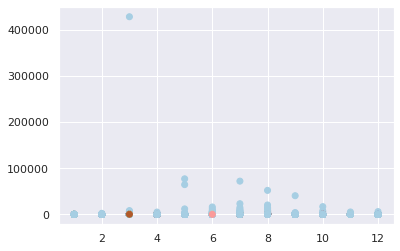

In [18]:
plt.scatter(df_fire['MONTH'][:10000],df_fire['FIRE_SIZE'][:10000], c=y_pred, cmap='Paired')

The system crashes for loading huge data once.